In [74]:
import numpy as np
import pandas as pd
from keras.utils import np_utils
np.random.seed(10)

In [75]:
from keras.datasets import mnist

### 下載 mnist 資料
    mnist資料檔案下走後會儲存再跟目錄底下的 ~/.keras/datasets

In [76]:
(x_train_image, y_train_label), (x_test_image, y_test_label) = mnist.load_data()

In [77]:
print('train data=', len(x_train_image))

train data= 60000


In [78]:
print('test data=', len(x_test_image))

test data= 10000


### 訓練資料是由 images 與 labels 所組成
    train_image 包含 60000 張手寫數字的圖片，而每一張圖片height與width皆為28。
    train_label 包含 60000 個手寫數字的標記，由 int 組成。

In [79]:
print('x_train_image:', x_train_image.shape)
print('y_train_label:', y_train_label.shape)

x_train_image: (60000, 28, 28)
y_train_label: (60000,)


In [80]:
import matplotlib.pyplot as plt
def plot_image(image):
    fig = plt.gcf()
    fig.set_size_inches(2, 2)
    plt.imshow(image, cmap='binary')
    plt.show()

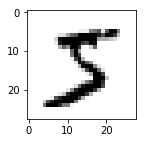

In [81]:
plot_image(x_train_image[0])

In [82]:
import matplotlib.pyplot as plt
def plot_images_labels_prediction(images, labels, prediction, idx, num=10):
    fig = plt.gcf()
    fig.set_size_inches(12, 14)
    if num>25:
        num = 25
    for i in range(0, num):
        ax = plt.subplot(5, 5, 1+i)
        ax.imshow(images[idx], cmap='binary')
        title = 'label=' + str(labels[idx])
        if len(prediction) > 0:
            title += ',predict=' + str(prediction[idx])
            
        ax.set_title(title, fontsize=10)
        ax.set_xticks([])
        ax.set_yticks([])
        idx += 1
    plt.show()
        

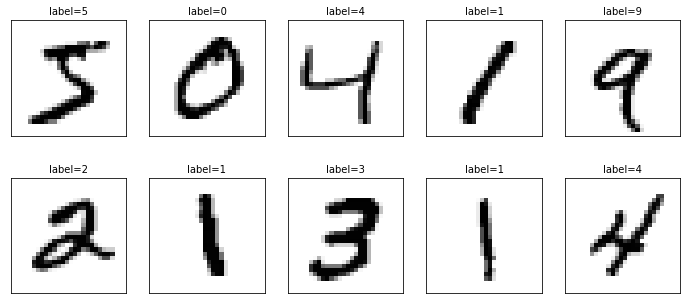

In [83]:
plot_images_labels_prediction(x_train_image, y_train_label, [], 0, 10)

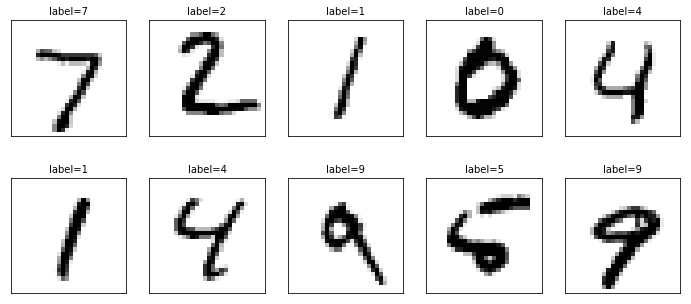

In [84]:
plot_images_labels_prediction(x_test_image, y_test_label, [], 0, 10)

In [85]:
x_Train = x_train_image.reshape(60000, 784).astype('float32')
x_Test = x_test_image.reshape(10000, 784).astype('float32')

In [86]:
print('x_Train:', x_Train.shape)
print('x_Test:', x_Test.shape)

x_Train: (60000, 784)
x_Test: (10000, 784)


In [87]:
x_Train[0]

array([   0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
          0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
          0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
          0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
          0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
          0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
          0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
          0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
          0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
          0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
          0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
          0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
          0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
          0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
          0.,    0.,

In [88]:
x_Train_normalize = x_Train / 255
x_Test_normalize = x_Test / 255

查看數字影像image的數字標準化後的結果，都是介於0與1之間。

In [89]:
x_Train_normalize[0]

array([ 0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.  

In [90]:
y_train_label[:5]

array([5, 0, 4, 1, 9], dtype=uint8)

In [91]:
y_TrainOneHot = np_utils.to_categorical(y_train_label)
y_TestOneHot = np_utils.to_categorical(y_test_label)

在機器學習建模前要先做資料預處理，如果遇到類別特徵（Categorical features），要先轉換成數值，但因為類別沒有順序之分，所以不可以轉換成有大小差別的數值，而要轉換成虛擬變數（Dummy variable），轉換的方法就叫做one-hot encoding（獨熱編碼）。

In [92]:
y_TrainOneHot[:5]

array([[ 0.,  0.,  0.,  0.,  0.,  1.,  0.,  0.,  0.,  0.],
       [ 1.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  0.,  1.,  0.,  0.,  0.,  0.,  0.],
       [ 0.,  1.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  1.]])

In [93]:
from keras.models import Sequential
from keras.layers import Dense

建立一個線性堆疊模型，後續只需要使用model.add()方法，將各神經網路層加入模型即可。

In [94]:
model = Sequential()

### 建立「輸入層(input layer)」與「隱藏層(hidden layer)」
   以下程式碼將「輸入層(input layer)」與「隱藏層(hidden layer)」加入模型，使用model.add()方法，加入Dense神經網路層。Dense神經網路層的特色是，所有的上一層與下一層的神經元都**完全連結**。

In [95]:
model.add(Dense(units=256, input_dim=784, kernel_initializer='normal', activation='relu'))

### 建立「輸出層」
下列程式碼建立「輸出層」，使用model.add()方法，加入Dense神經網路層，共有10個神經元，對應到0~9的數字，並使用softmax激活函數進行轉換，softmax可以將神經元的輸出，轉換為預測每一個數字的機率。

In [96]:
model.add(Dense(units=10, kernel_initializer='normal', activation='softmax'))

In [97]:
print(model.summary())

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_12 (Dense)             (None, 256)               200960    
_________________________________________________________________
dense_13 (Dense)             (None, 10)                2570      
Total params: 203,530
Trainable params: 203,530
Non-trainable params: 0
_________________________________________________________________
None


* **loss**: 設定損失函數(loss function)，在深度學習通常使用cross_entroy，訓練的效果比較好。
* **optimizer**:設定訓練時的最佳優化方法，在深度學習使用adam最優化方法，可以讓訓練更快收斂，並提高準確率。
* **metrics**: 設定評估模型的方式是accuracy準確率。

In [98]:
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [99]:
train_history = model.fit(x=x_Train_normalize, y=y_TrainOneHot, validation_split=0.2, epochs=10, batch_size=200, verbose=2)

Train on 48000 samples, validate on 12000 samples
Epoch 1/10
 - 2s - loss: 0.4388 - acc: 0.8829 - val_loss: 0.2180 - val_acc: 0.9409
Epoch 2/10
 - 1s - loss: 0.1907 - acc: 0.9458 - val_loss: 0.1554 - val_acc: 0.9561
Epoch 3/10
 - 1s - loss: 0.1354 - acc: 0.9618 - val_loss: 0.1258 - val_acc: 0.9650
Epoch 4/10
 - 1s - loss: 0.1029 - acc: 0.9703 - val_loss: 0.1115 - val_acc: 0.9680
Epoch 5/10
 - 1s - loss: 0.0811 - acc: 0.9774 - val_loss: 0.0977 - val_acc: 0.9718
Epoch 6/10
 - 1s - loss: 0.0660 - acc: 0.9817 - val_loss: 0.0931 - val_acc: 0.9722
Epoch 7/10
 - 1s - loss: 0.0544 - acc: 0.9851 - val_loss: 0.0911 - val_acc: 0.9735
Epoch 8/10
 - 1s - loss: 0.0459 - acc: 0.9876 - val_loss: 0.0820 - val_acc: 0.9758
Epoch 9/10
 - 1s - loss: 0.0379 - acc: 0.9902 - val_loss: 0.0810 - val_acc: 0.9764
Epoch 10/10
 - 1s - loss: 0.0317 - acc: 0.9917 - val_loss: 0.0803 - val_acc: 0.9755


In [100]:
import matplotlib.pyplot as plt

In [101]:
def show_train_history(train_history, train, validation):
    plt.plot(train_history.history[train])
    plt.plot(train_history.history[validation])
    plt.title('Train History')
    plt.ylabel(train)
    plt.xlabel('Epoch')
    plt.legend(['train', 'validation'], loc='upper left')
    plt.show()

### 畫出accuracy執行結果
* **acc:** 訓練資料的預測準確率
* **val_acc:** 驗證資料的預測準確率

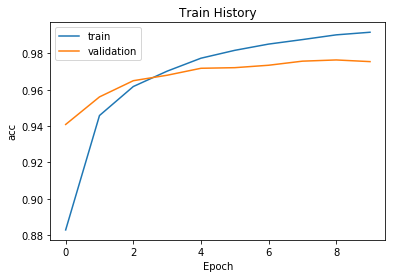

In [102]:
show_train_history(train_history, 'acc', 'val_acc')

### 畫出loss誤差執行結果
* **loss:** 訓練資料的預測誤差
* **val_loss:** 驗證資料的預測誤差

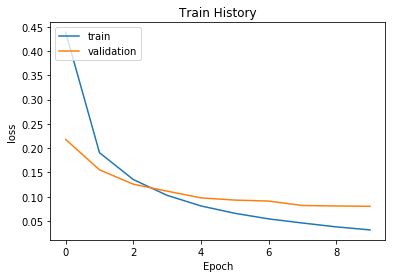

In [103]:
show_train_history(train_history, 'loss', 'val_loss')

# 以測試資料評估模型準確率

In [104]:
scores = model.evaluate(x_Test_normalize, y_TestOneHot)
print()
print('accuracy=', scores[1])

10000/10000 [==============================] - 0s 30us/step

accuracy= 0.9757


In [105]:
prediction = model.predict_classes(x_Test)

In [106]:
prediction

array([7, 2, 1, ..., 4, 5, 6], dtype=int64)

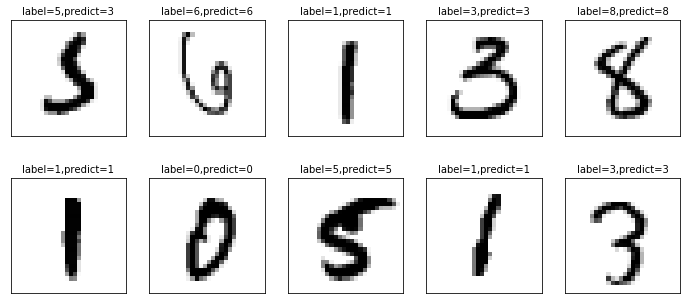

In [107]:
plot_images_labels_prediction(x_test_image, y_test_label, prediction, idx=340)

# 顯示混淆矩陣 (confusion matrix)

在機器學習領域，特別是統計分類的問題，混淆矩陣(confusion matrix)也稱為誤差矩陣(error matrix)，是一種特定的表格顯示方式，可以讓我們以視覺化的方式，了解我們的監督是學習演算法結果，看出演算模型是否混淆了兩個類。

### 使用 pandas crosstab 建立混淆矩陣

In [108]:
import pandas as pd

pd.crosstab(y_test_label, prediction, rownames=['label'], colnames=['predict'])

predict,0,1,2,3,4,5,6,7,8,9
label,,,,,,,,,,
0,971,0,1,1,1,0,2,1,3,0
1,0,1124,4,0,0,1,2,0,4,0
2,5,0,1009,2,1,0,2,4,9,0
3,0,0,4,992,0,1,0,3,6,4
4,1,0,5,1,961,0,3,0,3,8
5,3,0,0,15,1,854,7,1,8,3
6,5,3,2,1,3,3,939,0,2,0
7,0,5,13,7,1,0,0,986,6,10
8,5,0,3,6,1,1,1,2,954,1


In [109]:
df = pd.DataFrame({'label': y_test_label, 'predict': prediction})

In [110]:
df[:2]

,label,predict
0,7,7
1,2,2


In [111]:
df[((df.label==5)&(df.predict==3))]

,label,predict
340,5,3
1003,5,3
1393,5,3
2035,5,3
2526,5,3
2597,5,3
2810,5,3
3117,5,3
3902,5,3
4271,5,3


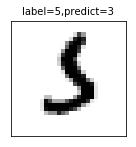

In [112]:
plot_images_labels_prediction(x_test_image, y_test_label, prediction, idx=340, num=1)

# 隱藏層從250增加為1000個神經元

In [113]:
model = Sequential()

In [114]:
#將「輸入層」與「隱藏層」加入模型

In [115]:
model.add(Dense(units=1000, input_dim=784, kernel_initializer='normal', activation='relu'))

In [116]:
#將「輸出層」加入模型 

In [117]:
model.add(Dense(units=10, kernel_initializer='normal', activation='softmax'))

In [118]:
print(model.summary())

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_14 (Dense)             (None, 1000)              785000    
_________________________________________________________________
dense_15 (Dense)             (None, 10)                10010     
Total params: 795,010
Trainable params: 795,010
Non-trainable params: 0
_________________________________________________________________
None


In [121]:
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [122]:
#開始訓練

In [123]:
train_history = model.fit(x=x_Train_normalize, y=y_TrainOneHot, validation_split=0.2, epochs=10, batch_size=200, verbose=2)

Train on 48000 samples, validate on 12000 samples
Epoch 1/10
 - 6s - loss: 0.2912 - acc: 0.9162 - val_loss: 0.1537 - val_acc: 0.9564
Epoch 2/10
 - 5s - loss: 0.1150 - acc: 0.9671 - val_loss: 0.1219 - val_acc: 0.9636
Epoch 3/10
 - 5s - loss: 0.0738 - acc: 0.9794 - val_loss: 0.0922 - val_acc: 0.9729
Epoch 4/10
 - 5s - loss: 0.0522 - acc: 0.9850 - val_loss: 0.0814 - val_acc: 0.9751
Epoch 5/10
 - 5s - loss: 0.0362 - acc: 0.9902 - val_loss: 0.0828 - val_acc: 0.9750
Epoch 6/10
 - 5s - loss: 0.0248 - acc: 0.9939 - val_loss: 0.0731 - val_acc: 0.9783
Epoch 7/10
 - 5s - loss: 0.0185 - acc: 0.9955 - val_loss: 0.0720 - val_acc: 0.9778
Epoch 8/10
 - 5s - loss: 0.0136 - acc: 0.9969 - val_loss: 0.0744 - val_acc: 0.9788
Epoch 9/10
 - 5s - loss: 0.0101 - acc: 0.9982 - val_loss: 0.0711 - val_acc: 0.9794
Epoch 10/10
 - 5s - loss: 0.0071 - acc: 0.9990 - val_loss: 0.0788 - val_acc: 0.9774


* 不論訓練與驗證，準確率越來越高
* 但是，在Epoch訓練後期，「acc訓練的準確率」比「val_acc驗證的準確率」高。
#### Overfittin 更嚴重

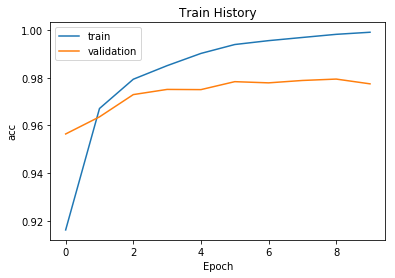

In [124]:
show_train_history(train_history, 'acc', 'val_acc')

# multilayer proceptro加入DropOut功能以避免overfitting

In [125]:
from keras.layers import Dropout

In [126]:
model = Sequential()
model.add(Dense(units=1000, input_dim=784, kernel_initializer='normal', activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(units=10, kernel_initializer='normal', activation='softmax'))

In [127]:
print(model.summary())

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_16 (Dense)             (None, 1000)              785000    
_________________________________________________________________
dropout_1 (Dropout)          (None, 1000)              0         
_________________________________________________________________
dense_17 (Dense)             (None, 10)                10010     
Total params: 795,010
Trainable params: 795,010
Non-trainable params: 0
_________________________________________________________________
None


In [129]:
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
train_history = model.fit(x=x_Train_normalize, y=y_TrainOneHot, validation_split=0.2, epochs=10, batch_size=200, verbose=2)

Train on 48000 samples, validate on 12000 samples
Epoch 1/10
 - 6s - loss: 0.3528 - acc: 0.8943 - val_loss: 0.1618 - val_acc: 0.9544
Epoch 2/10
 - 6s - loss: 0.1594 - acc: 0.9533 - val_loss: 0.1181 - val_acc: 0.9642
Epoch 3/10
 - 7s - loss: 0.1153 - acc: 0.9664 - val_loss: 0.0969 - val_acc: 0.9700
Epoch 4/10
 - 6s - loss: 0.0905 - acc: 0.9731 - val_loss: 0.0877 - val_acc: 0.9718
Epoch 5/10
 - 6s - loss: 0.0748 - acc: 0.9775 - val_loss: 0.0800 - val_acc: 0.9755
Epoch 6/10
 - 6s - loss: 0.0639 - acc: 0.9798 - val_loss: 0.0759 - val_acc: 0.9782
Epoch 7/10
 - 6s - loss: 0.0549 - acc: 0.9835 - val_loss: 0.0743 - val_acc: 0.9783
Epoch 8/10
 - 7s - loss: 0.0463 - acc: 0.9856 - val_loss: 0.0701 - val_acc: 0.9798
Epoch 9/10
 - 7s - loss: 0.0418 - acc: 0.9868 - val_loss: 0.0705 - val_acc: 0.9796
Epoch 10/10
 - 6s - loss: 0.0367 - acc: 0.9887 - val_loss: 0.0690 - val_acc: 0.9804


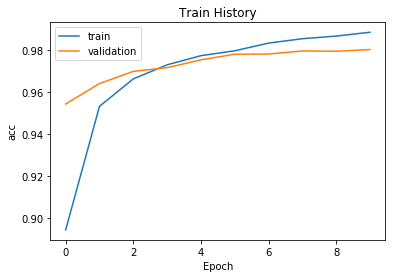

In [130]:
show_train_history(train_history, 'acc', 'val_acc')

In [131]:
scores = model.evaluate(x_Test_normalize, y_TestOneHot)

10000/10000 [==============================] - 1s 78us/step


In [132]:
print('accuracy=', scores[1])

accuracy= 0.9811


# 建立multilayer perceptron模型包含2個隱藏層

In [133]:
model = Sequential()

In [134]:
# 第 1 個隱藏層
model.add(Dense(units=1000, input_dim=784, kernel_initializer='normal', activation='relu'))
model.add(Dropout(0.5))
# 第 2 個隱藏層
model.add(Dense(units=1000, input_dim=784, kernel_initializer='normal', activation='relu'))
model.add(Dropout(0.5))

In [135]:
# 加入輸出層
model.add(Dense(units=10, kernel_initializer='normal', activation='softmax'))

In [136]:
print(model.summary())

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_18 (Dense)             (None, 1000)              785000    
_________________________________________________________________
dropout_2 (Dropout)          (None, 1000)              0         
_________________________________________________________________
dense_19 (Dense)             (None, 1000)              1001000   
_________________________________________________________________
dropout_3 (Dropout)          (None, 1000)              0         
_________________________________________________________________
dense_20 (Dense)             (None, 10)                10010     
Total params: 1,796,010
Trainable params: 1,796,010
Non-trainable params: 0
_________________________________________________________________
None


#### 開始訓練

In [137]:
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
train_history = model.fit(x=x_Train_normalize, y=y_TrainOneHot, validation_split=0.2, epochs=10, batch_size=200, verbose=2)

Train on 48000 samples, validate on 12000 samples
Epoch 1/10
 - 17s - loss: 0.3755 - acc: 0.8833 - val_loss: 0.1326 - val_acc: 0.9611
Epoch 2/10
 - 16s - loss: 0.1602 - acc: 0.9500 - val_loss: 0.1005 - val_acc: 0.9694
Epoch 3/10
 - 15s - loss: 0.1194 - acc: 0.9633 - val_loss: 0.0919 - val_acc: 0.9724
Epoch 4/10
 - 17s - loss: 0.0987 - acc: 0.9694 - val_loss: 0.0795 - val_acc: 0.9776
Epoch 5/10
 - 15s - loss: 0.0826 - acc: 0.9739 - val_loss: 0.0773 - val_acc: 0.9774
Epoch 6/10
 - 16s - loss: 0.0757 - acc: 0.9762 - val_loss: 0.0725 - val_acc: 0.9797
Epoch 7/10
 - 16s - loss: 0.0661 - acc: 0.9790 - val_loss: 0.0729 - val_acc: 0.9784
Epoch 8/10
 - 16s - loss: 0.0605 - acc: 0.9800 - val_loss: 0.0740 - val_acc: 0.9788
Epoch 9/10
 - 17s - loss: 0.0556 - acc: 0.9819 - val_loss: 0.0759 - val_acc: 0.9792
Epoch 10/10
 - 15s - loss: 0.0520 - acc: 0.9834 - val_loss: 0.0785 - val_acc: 0.9778


#### 「訓練準確率」與「驗證的準確率」差距變小，代表已經大致解決了overfittin的問題。

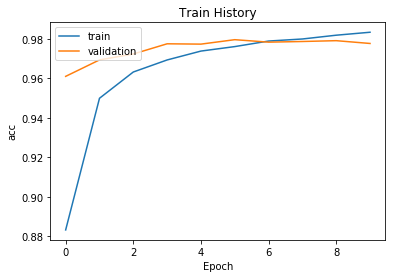

In [138]:
show_train_history(train_history, 'acc', 'val_acc')

#### 查看準確率

In [139]:
scores = model.evaluate(x_Test_normalize, y_TestOneHot)
print()
print('accuracy=', scores[1])

10000/10000 [==============================] - 1s 135us/step

accuracy= 0.98


### 結論
我們使用多層感知器(Multilayer perceptron)模型，辨識Mnist資料集中的手寫數字，並且嘗試將模型加寬、加深，以提高準確率，並且加入Dropout層，以避免overfitting，準確率接近0.98。不過Multilayer perceptron有其極限，如果還要進一步提升準確率，就必須使用**卷積神經網路CNN(Convolutional nerual network)**